# Project 3 Regression

Predicting house prices is a critical task in the real estate industry, as it directly impacts buyers, sellers, and investors. The goal of this project is to develop a predictive model that accurately estimates the sale price of residential properties in Ames, Iowa. This challenge is particularly significant given the wide range of factors that can influence property prices, from physical characteristics to neighborhood features.

The dataset used in this project comes from the Kaggle competition titled “House Prices: Advanced Regression Techniques.” It contains 79 explanatory variables that describe almost every aspect of residential homes in Ames, Iowa. These features include lot size, building dimensions, year built, quality ratings, and more. The competition challenges participants to predict the final sale price of each house based on these variables. The dataset was compiled by Dean De Cock for educational purposes and serves as a modern alternative to the Boston Housing dataset.

The project’s objective is to predict the sale price of each house given its features. The predictions are evaluated using Root Mean Squared Error (RMSE) between the logarithm of the predicted and actual sale prices. Using logarithms ensures that errors in predicting both expensive and inexpensive houses are treated equally, preventing bias toward high-priced properties.

Regression analysis is at the core of this project, as it is well-suited for predicting continuous numerical values such as house prices. In regression, a mathematical model is constructed to estimate the relationship between one or more independent variables (features) and a dependent variable (sale price). One commonly used regression technique is linear regression, which models the relationship between the dependent and independent variables as a linear combination of the input features. However, more advanced techniques like random forest regression and gradient boosting regression can also be applied to capture complex patterns and interactions within the data. These techniques build multiple decision trees and combine their outputs to achieve better accuracy and robustness.

By leveraging feature engineering and advanced regression techniques, this project aims to create a reliable model that accurately predicts house prices, offering valuable insights for real estate professionals and stakeholders.



In [71]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical computations

# Import libraries for data visualization
import matplotlib.pyplot as plt  # Library for creating static and interactive plots
import seaborn as sns  # Library for creating informative and attractive statistical graphics

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Import libraries for machine learning
from sklearn.linear_model import LinearRegression  # Library for linear regression models
from sklearn.model_selection import train_test_split  # Library for splitting data into training and testing sets
from sklearn.metrics import mean_squared_error  # Library for evaluating model performance using mean squared error

from sklearn.feature_selection import RFE, SequentialFeatureSelector, VarianceThreshold, SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

In [72]:
# Load training and testing data from CSV files
train_df = pd.read_csv('train.csv')  # Load training data into a Pandas DataFrame
test_df = pd.read_csv('test.csv')  # Load testing data into a Pandas DataFrame

# Display the first few rows of the training data to verify loading and formatting
train_df.head()  # Print the first few rows of the training DataFrame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [73]:
# Display information about the training data, including data types and counts of non-null values
train_df.info()  # Print a concise summary of the training DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [74]:
# Display information about the testing data, including data types and counts of non-null values
test_df.info()  # Print a concise summary of the testing DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [75]:
# Generate descriptive statistics for the training data, including mean, std, min, 25%, 50%, 75%, and max values
train_df.describe()  # Print summary statistics for the training DataFrame

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [76]:
# Generate descriptive statistics for the testing data, including mean, std, min, 25%, 50%, 75%, and max values
test_df.describe()  # Print summary statistics for the testing DataFrame

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [77]:
# Print the count of missing values in each column of the training data
print(train_df.isnull().sum())  # Display the total number of null values in each column of the training DataFrame

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [78]:
# Print the count of missing values in each column of the testing data
print(test_df.isnull().sum())  # Display the total number of null values in each column of the testing DataFrame

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [79]:
# Remove columns from the training and testing data that have more than 45% missing values
train_df = train_df.drop(train_df.columns[(train_df.isnull().sum() / train_df.shape[0] > 0.45)], axis=1)
# Drop columns with high missing value rates from the training DataFrame

test_df = test_df.drop(test_df.columns[(test_df.isnull().sum() / test_df.shape[0] > 0.45)], axis=1)
# Drop columns with high missing value rates from the testing DataFrame

# Verify the updated count of missing values in each column of the training and testing data
print(train_df.isnull().sum())  # Display the updated total number of null values in each column of the training DataFrame
print(test_df.isnull().sum())  # Display the updated total number of null values in each column of the testing DataFrame

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 74, dtype: int64


In [80]:
# Replace missing values in the 'LotFrontage' column with the median value for both training and testing data
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].median())
# Fill missing values in the 'LotFrontage' column of the training DataFrame with the median value

test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].median())
# Fill missing values in the 'LotFrontage' column of the testing DataFrame with the median value

# Verify the updated count of missing values in each column of the training and testing data
print(train_df.isnull().sum())  # Display the updated total number of null values in each column of the training DataFrame
print(test_df.isnull().sum())  # Display the updated total number of null values in each column of the testing DataFrame

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64
Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 74, dtype: int64


In [81]:
# Replace missing values in categorical columns with the most frequent value (mode) for both training and testing data
train_df = train_df.fillna(train_df.mode().iloc[0])
# Fill missing values in the training DataFrame with the most frequent value (mode) for each column

test_df = test_df.fillna(test_df.mode().iloc[0])
# Fill missing values in the testing DataFrame with the most frequent value (mode) for each column

# Verify the updated count of missing values in each column of the training and testing data
print(train_df.isnull().sum())  # Display the updated total number of null values in each column of the training DataFrame
print(test_df.isnull().sum())  # Display the updated total number of null values in each column of the testing DataFrame

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 74, dtype: int64


In [82]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [83]:
# Remove non-informative columns from the training and testing data
train_df = train_df.drop(['Id', 'Street', 'LotShape', 'LandContour', 'Utilities', 
                          'LotConfig', 'LandSlope', 'RoofMatl', 'Heating', 'CentralAir',
                          'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'BsmtCond',], axis=1)
# Drop columns that do not provide useful information for modeling from the training DataFrame

test_df = test_df.drop(['Id', 'Street', 'LotShape', 'LandContour', 'Utilities', 
                        'LotConfig', 'LandSlope', 'RoofMatl', 'Heating', 'CentralAir',
                        'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'BsmtCond',], axis=1)
# Drop columns that do not provide useful information for modeling from the testing DataFrame

# Display the first few rows of the updated training data to verify changes
train_df.head()  # Print the first few rows of the updated training DataFrame

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,CollgCr,Norm,Norm,1Fam,2Story,7,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Veenker,Feedr,Norm,1Fam,1Story,6,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,CollgCr,Norm,Norm,1Fam,2Story,7,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Crawfor,Norm,Norm,1Fam,2Story,7,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,NoRidge,Norm,Norm,1Fam,2Story,8,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [84]:
# Remove columns 'Condition1' and 'Condition2' from the training and testing data
# These columns have dominant values for normal conditions (86% and 99% respectively)
# and are suggested to have little to no predictive power
train_df = train_df.drop(['Condition1', 'Condition2'], axis=1)
# Drop columns 'Condition1' and 'Condition2' from the training DataFrame

test_df = test_df.drop(['Condition1', 'Condition2'], axis=1)
# Drop columns 'Condition1' and 'Condition2' from the testing DataFrame

# Display the first few rows of the updated training data to verify changes
train_df.head()  # Print the first few rows of the updated training DataFrame

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,CollgCr,1Fam,2Story,7,5,2003,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Veenker,1Fam,1Story,6,8,1976,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,CollgCr,1Fam,2Story,7,5,2001,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Crawfor,1Fam,2Story,7,5,1915,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,NoRidge,1Fam,2Story,8,5,2000,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [85]:
# One-hot encode categorical columns to ensure a 1 or 0 output
# This will convert categorical variables into numerical variables that can be used in modeling
columns_to_encode = ['BldgType', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'RoofStyle', 'ExterQual',
                     'ExterCond', 'Foundation',  'HeatingQC', 'KitchenQual',
                     'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition', 'PavedDrive', 'MSZoning', 
                     'BsmtQual',  'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',]
# Define the list of columns to be one-hot encoded

train_df = pd.get_dummies(train_df, columns=columns_to_encode, drop_first=True, dtype=int)
# One-hot encode the specified columns in the training DataFrame, dropping the first category to avoid multicollinearity
# and ensuring a 1 or 0 output by specifying dtype=int

test_df = pd.get_dummies(test_df, columns=columns_to_encode, drop_first=True, dtype=int)
# One-hot encode the specified columns in the testing DataFrame, dropping the first category to avoid multicollinearity
# and ensuring a 1 or 0 output by specifying dtype=int

# Display the first few rows of the updated training data to verify changes
train_df.head()  # Print the first few rows of the updated training DataFrame

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf
0,60,65.0,8450,CollgCr,7,5,2003,2003,196.0,706,...,0,1,0,0,0,0,0,0,0,1
1,20,80.0,9600,Veenker,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,CollgCr,7,5,2001,2002,162.0,486,...,0,1,0,0,0,0,0,0,0,1
3,70,60.0,9550,Crawfor,7,5,1915,1970,0.0,216,...,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,NoRidge,8,5,2000,2000,350.0,655,...,0,1,0,0,0,0,0,0,0,1


In [86]:
# Step 1: Calculate the overall mean house price
# This will be used as a baseline to compare the mean house prices of different neighborhoods
overall_mean = train_df['SalePrice'].mean()
# Calculate the mean of the 'SalePrice' column in the training DataFrame

# Step 2: Calculate the mean house price for each neighborhood
# This will help us understand how the mean house price varies across different neighborhoods
neighborhood_means = train_df.groupby('Neighborhood')['SalePrice'].mean()
# Group the training DataFrame by the 'Neighborhood' column and calculate the mean of the 'SalePrice' column for each group

# Step 3: Map the mean values to the 'Neighborhood' column
# This will create a new column 'Neighborhood_Encoded' that contains the mean house price for each neighborhood
train_df['Neighborhood_Encoded'] = train_df['Neighborhood'].map(neighborhood_means)
# Create a new column 'Neighborhood_Encoded' in the training DataFrame by mapping the 'Neighborhood' column to the mean house prices calculated earlier

test_df['Neighborhood_Encoded'] = test_df['Neighborhood'].map(neighborhood_means)
# Create a new column 'Neighborhood_Encoded' in the testing DataFrame by mapping the 'Neighborhood' column to the mean house prices calculated earlier

# Optional: Track the positive and negative influences
# This will help us understand how each neighborhood affects the house price compared to the overall mean
neighborhood_influence = neighborhood_means - overall_mean
# Calculate the difference between the mean house price of each neighborhood and the overall mean

print("Neighborhood Influence on Price:")
print(neighborhood_influence.sort_values(ascending=False))
# Print the neighborhood influences in descending order (i.e., from most positive to most negative)

# Drop the original 'Neighborhood' column after encoding
# This is because we no longer need the original 'Neighborhood' column after creating the 'Neighborhood_Encoded' column
train_df = train_df.drop(['Neighborhood'], axis=1)
# Drop the 'Neighborhood' column from the training DataFrame

test_df = test_df.drop(['Neighborhood'], axis=1)
# Drop the 'Neighborhood' column from the testing DataFrame

# Display the top 5 rows of the updated DataFrame
print(train_df[['Neighborhood_Encoded', 'SalePrice']].head())
# Print the top 5 rows of the updated training DataFrame, showing the 'Neighborhood_Encoded' and 'SalePrice' columns


Neighborhood Influence on Price:
Neighborhood
NoRidge    154374.121183
NridgHt    135349.427486
StoneBr    129577.804110
Timber      61326.251478
Veenker     57851.531382
Somerst     44458.641319
ClearCr     31644.232681
Crawfor     29703.529600
CollgCr     17044.577443
Blmngtn     13949.686463
Gilbert     11933.310439
NWAmes       8128.872603
SawyerW      5634.600720
Mitchel    -24651.073441
NAmes      -35074.115890
NPkVill    -38226.751446
SWISU      -38329.835890
Blueste    -43421.195890
Sawyer     -44128.060755
OldTown    -52695.895005
Edwards    -52701.495890
BrkSide    -56087.144166
BrDale     -76427.445890
IDOTRR     -80797.412107
MeadowV    -82344.725302
Name: SalePrice, dtype: float64
   Neighborhood_Encoded  SalePrice
0         197965.773333     208500
1         238772.727273     181500
2         197965.773333     223500
3         210624.725490     140000
4         335295.317073     250000


In [87]:
# Calculate the correlation matrix of the training DataFrame
# This will help us understand the relationships between different columns in the DataFrame
train_df.corr()
# Calculate the correlation coefficient for each pair of columns in the training DataFrame

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Neighborhood_Encoded
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,0.094668,-0.006306,-0.092449,0.033129,-0.023714,0.053758,-0.050283,-0.039690,0.055104,-0.009743
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.081539,-0.058127,0.030606,-0.047972,0.020613,-0.048225,0.010554,0.030550,-0.029163,0.221334
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.013542,-0.021710,0.035378,-0.066866,0.057244,0.000230,-0.002191,0.108512,-0.096458,0.153487
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.433448,-0.093390,-0.170811,-0.024834,-0.077588,-0.001985,-0.046990,-0.079705,0.108444,0.685360
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.157314,0.032068,0.056660,-0.049747,0.037339,0.005972,0.026556,0.042188,-0.088238,-0.214951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BsmtFinType2_GLQ,0.053758,-0.048225,0.000230,-0.001985,0.005972,0.019379,0.016305,-0.049508,-0.045859,0.373082,...,-0.062321,0.201552,-0.031151,-0.067478,-0.014963,1.000000,-0.017747,-0.019283,-0.274722,-0.028327
BsmtFinType2_LwQ,-0.050283,0.010554,-0.002191,-0.046990,0.026556,-0.021729,-0.080711,-0.029220,0.070188,0.295483,...,-0.027496,-0.041676,0.051912,-0.123691,-0.027428,-0.017747,1.000000,-0.035347,-0.503579,-0.037035
BsmtFinType2_Rec,-0.039690,0.030550,0.108512,-0.079705,0.042188,-0.062681,-0.075922,-0.023649,-0.018232,0.420373,...,-0.051867,0.087076,-0.062043,-0.134397,-0.029802,-0.019283,-0.035347,1.000000,-0.547164,-0.053068
BsmtFinType2_Unf,0.055104,-0.029163,-0.096458,0.108444,-0.088238,0.072138,0.107234,0.056529,0.001572,-0.799506,...,0.107521,-0.192658,-0.059073,0.245624,-0.424579,-0.274722,-0.503579,-0.547164,1.000000,0.083828


In [88]:
# Import the variance_inflation_factor function from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical features for VIF calculation
# This will exclude the 'SalePrice' column and only consider numerical columns
numerical_features = train_df.select_dtypes(include=[np.number]).drop(['SalePrice'], axis=1)
# Select numerical columns from the training DataFrame and drop the 'SalePrice' column

# Calculate VIF for each feature
# This will help us identify features that are highly correlated with each other
vif_data = pd.DataFrame()
# Create an empty DataFrame to store the VIF results

vif_data['Feature'] = numerical_features.columns
# Add a column to the DataFrame with the feature names

vif_data['VIF'] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]
# Calculate the VIF for each feature and add it to the DataFrame

# Print the VIF results in descending order (i.e., from highest to lowest)
print(vif_data.sort_values(by='VIF', ascending=False))
# Sort the DataFrame by the VIF column in descending order and print the results

# Save the VIF results to a CSV file
vif_data.to_csv('vif_output.csv', index=False)
# Write the DataFrame to a CSV file named 'vif_output.csv' without including the index column


/home/tclark/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                Feature       VIF
13             2ndFlrSF       inf
12             1stFlrSF       inf
64   Exterior2nd_CBlock       inf
50   Exterior1st_CBlock       inf
8            BsmtFinSF1       inf
..                  ...       ...
92      Foundation_Wood  1.175551
113        SaleType_Oth  1.170844
95         HeatingQC_Po  1.140425
108        SaleType_Con  1.133632
30            3SsnPorch  1.122408

[143 rows x 2 columns]


In [89]:
# Identify features with high VIF values (> 25)
# This is a common threshold for identifying features with high multicollinearity
high_vif = vif_data[vif_data['VIF'] > 25]
# Filter the VIF DataFrame to include only rows where the VIF value is greater than 25

# Print the features with high VIF values
print(high_vif)
# Print the filtered DataFrame to display the features with high VIF values



                   Feature           VIF
0               MSSubClass  8.291678e+01
3              OverallQual  9.419205e+01
4              OverallCond  5.720226e+01
5                YearBuilt  4.536355e+04
6             YearRemodAdd  3.002525e+04
8               BsmtFinSF1           inf
9               BsmtFinSF2           inf
10               BsmtUnfSF           inf
11             TotalBsmtSF           inf
12                1stFlrSF           inf
13                2ndFlrSF           inf
14            LowQualFinSF           inf
15               GrLivArea           inf
18                FullBath  3.220794e+01
20            BedroomAbvGr  4.064494e+01
21            KitchenAbvGr  8.486281e+01
22            TotRmsAbvGrd  9.751423e+01
24             GarageYrBlt  1.989267e+04
25              GarageCars  4.291093e+01
26              GarageArea  3.785962e+01
35                  YrSold  6.569009e+04
50      Exterior1st_CBlock           inf
51     Exterior1st_CemntBd  3.666237e+01
52     Exterior1

# Split the dataset into training and testing sets
- also define the feature set (X) and the target variable (y)

In [90]:
# Define the feature set (X) and the target variable (y)
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

# Split the data into training and testing sets with a 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Method 1: Variance Threshold (remove features with low variance)

In [91]:
# Create a dictionary to store the selected features from different feature selection methods
selected_features = {}

# Use VarianceThreshold to select features with a variance threshold of 0.1
from sklearn.feature_selection import VarianceThreshold

selector_variance = VarianceThreshold(threshold=0.1)
selector_variance.fit(X_train)

# Get the selected features and store them in the dictionary
selected_features['Variance Threshold'] = X_train.columns[selector_variance.get_support()].tolist()

### Method 2: Correlation (check and remove highly correlated features)

In [92]:
# Calculate the correlation matrix of the training data
correlation_matrix = X_train.corr().abs()

# Get the upper triangle of the correlation matrix
# This is done to avoid duplicate comparisons and to only consider the correlations between different features
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Identify the features with high correlation (above 0.9)
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Select the features that are not highly correlated with each other
selected_features['Correlation'] = X_train.columns.difference(high_corr_features).tolist()

### Method 3: Statistical Test (SelectKBest with ANOVA F-test)s

In [93]:
# Use SelectKBest to select the top 11 features based on the F-regression score
# The F-regression score is a statistical test that measures the correlation between each feature and the target variable
selector_kbest = SelectKBest(score_func=f_regression, k=8)

# Fit the SelectKBest selector to the training data
selector_kbest.fit(X_train, y_train)

# Get the selected features and store them in the dictionary
selected_features['Statistical Test (SelectKBest)'] = X_train.columns[selector_kbest.get_support()].tolist()

### Method 4: Forward Selection with Linear Regression

In [94]:
# Use SequentialFeatureSelector to perform forward selection with linear regression
# This selects the top 10 features that have the highest correlation with the target variable
lr_model = LinearRegression()  # Create a linear regression model
forward_selector = SequentialFeatureSelector(lr_model, n_features_to_select=8, direction='forward', scoring='neg_mean_squared_error', cv=8)

# Fit the forward selector to the training data
forward_selector.fit(X_train, y_train)

# Get the selected features and store them in the dictionary
selected_features['Forward Selection (Linear Regression)'] = X_train.columns[forward_selector.get_support()].tolist()

### Method 5: Recursive Feature Elimination (RFE) with Decision Tree Regressor

In [95]:
# Use Recursive Feature Elimination (RFE) with a decision tree regressor to select the top 11 features
dt_model = DecisionTreeRegressor()  # Create a decision tree regressor model
rfe_selector = RFE(dt_model, n_features_to_select=8)  # Initialize the RFE selector with the decision tree model and the number of features to select

# Fit the RFE selector to the training data
rfe_selector.fit(X_train, y_train)

# Get the selected features and store them in the dictionary
selected_features['RFE (Decision Tree Regressor)'] = X_train.columns[rfe_selector.get_support()].tolist()

### Display the Features Selected by Each Method

In [116]:
selected_features_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in selected_features.items()]))
selected_features_df

,Variance Threshold,Correlation,Statistical Test (SelectKBest),Forward Selection (Linear Regression),RFE (Decision Tree Regressor)
0,MSSubClass,1stFlrSF,OverallQual,MSSubClass,LotFrontage
1,LotFrontage,2ndFlrSF,TotalBsmtSF,OverallQual,OverallQual
2,LotArea,3SsnPorch,1stFlrSF,GrLivArea,TotalBsmtSF
3,OverallQual,BedroomAbvGr,GrLivArea,BsmtFullBath,1stFlrSF
4,OverallCond,BldgType_2fmCon,GarageCars,GarageCars,2ndFlrSF
...,...,...,...,...,...
131,NaN,TotalBsmtSF,NaN,NaN,NaN
132,NaN,WoodDeckSF,NaN,NaN,NaN
133,NaN,YearBuilt,NaN,NaN,NaN
134,NaN,YearRemodAdd,NaN,NaN,NaN


## KNN

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np  # Import numpy for sqrt function

X_selected = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 
              'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 
              'GrLivArea', 'GarageArea', 'MoSold', 'Neighborhood_Encoded']

X = train_df[X_selected]  # Extract the actual feature values
y = train_df['SalePrice']  # Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsRegressor(n_neighbors=10)  # Corrected to KNeighborsRegressor
knn.fit(X_scaled, y)

y_pred_train = knn.predict(X_scaled)

mae = mean_absolute_error(y, y_pred_train)
mse = mean_squared_error(y, y_pred_train)  # Calculate MSE
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y, y_pred_train)

# Print results
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")



MAE: 18198.2395
RMSE: 30839.5318
R² Score: 0.8492


## KNN Plot
At KNN 5, the model is able to capture the underlying patterns in the data with a smaller number of neighbors, resulting in more accurate predictions.
As you increase the number of neighbors (K), the model starts to overfit the data, trying to fit the noise rather than the underlying patterns. This results in less accurate predictions.
At KNN 15, the model has overfit the data to the point where it's making the least accurate predictions.

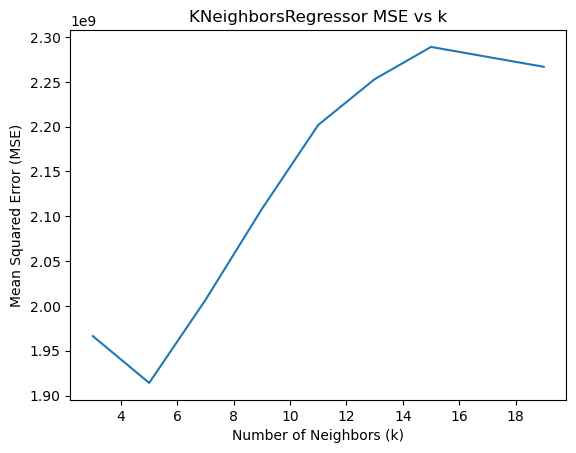

In [98]:
# Define a list of k values to test for the KNeighborsRegressor
# These values will be used to determine the number of neighbors to consider when making predictions
k_values = [3, 5, 7, 9, 11, 13, 15, 19]

# Initialize an empty list to store the mean squared error (MSE) values for each k value
mse_k = []

# Iterate over each k value in the list
for i in k_values:
  # Create a new KNeighborsRegressor instance with the current k value
  # This will determine the number of neighbors to consider when making predictions
  knn = KNeighborsRegressor(n_neighbors=i)
  
  # Train the KNeighborsRegressor model using the training data
  # This will allow the model to learn the relationships between the features and the target variable
  knn.fit(X_train, y_train)
  
  # Use the trained model to make predictions on the test data
  # These predictions will be used to calculate the MSE
  y_pred = knn.predict(X_test)
  
  # Calculate the mean squared error (MSE) between the predicted values and the actual values
  # This will give us a measure of the model's performance for the current k value
  mse = mean_squared_error(y_test, y_pred)
  
  # Append the MSE value to the list of MSE values
  # This will allow us to plot the MSE values for each k value later
  mse_k.append(mse)

# Create a plot of the MSE values against the k values
# This will allow us to visualize the relationship between the number of neighbors and the model's performance
plt.plot(k_values, mse_k)

# Add a label to the x-axis to indicate that it represents the number of neighbors (k)
plt.xlabel('Number of Neighbors (k)')

# Add a label to the y-axis to indicate that it represents the mean squared error (MSE)
plt.ylabel('Mean Squared Error (MSE)')

# Add a title to the plot to indicate that it shows the MSE vs k for the KNeighborsRegressor
plt.title('KNeighborsRegressor MSE vs k')

# Display the plot
plt.show()

In [99]:
knn = KNeighborsRegressor(n_neighbors=5)  # Corrected to KNeighborsRegressor
knn.fit(X_scaled, y)

y_pred_train = knn.predict(X_scaled)

mae = mean_absolute_error(y, y_pred_train)
mse = mean_squared_error(y, y_pred_train)  # Calculate MSE
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y, y_pred_train)

# Print results
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 16656.4762
RMSE: 27821.8354
R² Score: 0.8773


In [100]:
# hypertune with grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np  # For sqrt function

# Define the features you want to use
X_selected = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 
              'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 
              'GrLivArea', 'GarageArea', 'MoSold', 'Neighborhood_Encoded']

# Ensure X_train and X_test only contain the selected features
X_train_selected = X_train[X_selected]
X_test_selected = X_test[X_selected]

# Initialize the KNeighborsRegressor model
model = KNeighborsRegressor()

# Define the hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 19],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_selected)

# Calculate MAE, RMSE, and R^2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # Compute MSE
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)

# Print results
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
MAE: 26889.8094
RMSE: 44615.2748
R² Score: 0.7405


In [101]:
import statsmodels.api as sm
X = train_df[X_selected]
y = train_df['SalePrice']

X = sm.add_constant(X)  # Adds an intercept term to the model

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     487.0
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:14:53   Log-Likelihood:                -17316.
No. Observations:                1460   AIC:                         3.466e+04
Df Residuals:                    1446   BIC:                         3.473e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -6.431e+05 

In [102]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# Define your KNN model
knn = KNeighborsRegressor(n_neighbors=5)

# Define custom scoring (you can add multiple metrics)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']

# Perform cross-validation
cv_results = cross_validate(knn, X_scaled, y, cv=5, scoring=scoring, return_train_score=True)

# Print the results
print(f"Average MAE: {-cv_results['test_neg_mean_absolute_error'].mean():.4f}")
print(f"Average RMSE: {np.sqrt(-cv_results['test_neg_mean_squared_error'].mean()):.4f}")
print(f"Average R²: {cv_results['test_r2'].mean():.4f}")


Average MAE: 20811.6644
Average RMSE: 34372.7527
Average R²: 0.8131


## Decision Tree

In [103]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np  # For sqrt function

# Define the features you want to use
X_selected = ['LotArea', 'OverallQual', 'YearRemodAdd', 
              'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', 
              'GarageArea', 'Neighborhood_Encoded']

# Ensure X_train and X_test only contain the selected features
X_train_selected = X_train[X_selected]
X_test_selected = X_test[X_selected]

# Initialize the Decision Tree Regressor model
model = DecisionTreeRegressor(max_depth=7, random_state=42)

# Train the model with the selected features
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Manually calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")



MAE: 24913.0290
RMSE: 39985.5861
R² Score: 0.7916


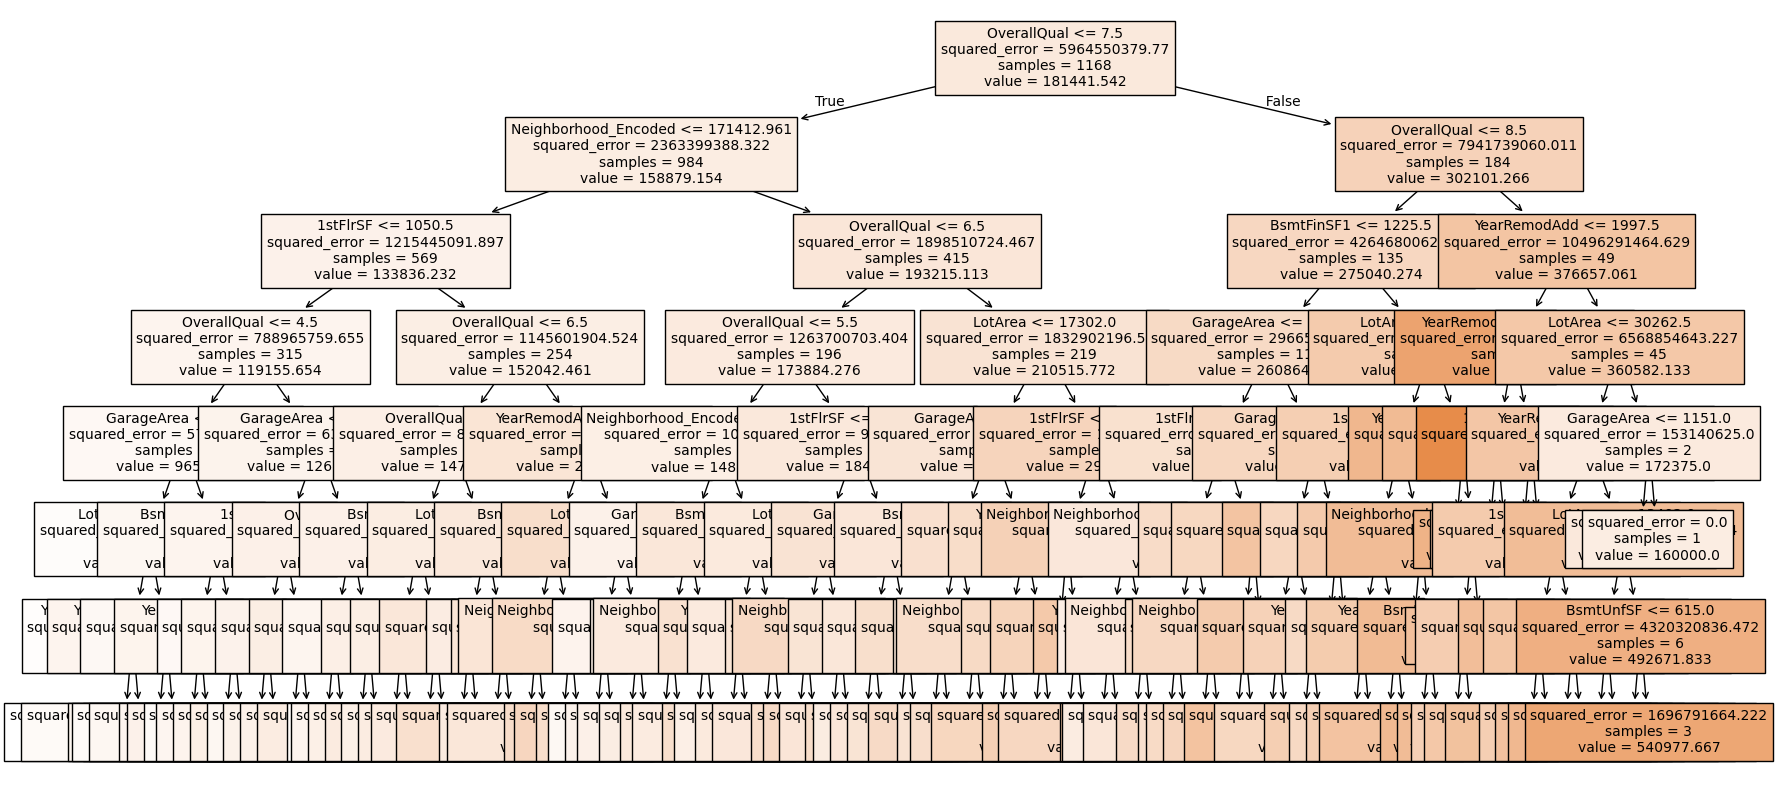

In [104]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X_train_selected.columns, fontsize=10)
plt.show()


## Cross Validation

In [105]:
from sklearn.model_selection import cross_val_score
model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=2, random_state=42)
cv_scores = cross_val_score(model, X_train_selected, y_train, cv=8, scoring='neg_mean_absolute_error')
print(f"Cross-validated MAE: {-cv_scores.mean():.4f}")


Cross-validated MAE: 27926.9898


In [106]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation MAE: {-grid_search.best_score_:.4f}")


Best parameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation MAE: 26145.5702


In [107]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Initialize the model with the best parameters
best_dt_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=2)

# Train the model on the selected features of the training data
best_dt_model.fit(X_train_selected, y_train)

# Predict on the training and test data
y_pred_train = best_dt_model.predict(X_train_selected)
y_pred_test = best_dt_model.predict(X_test_selected)

# Calculate MAE for both training and test data
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results
print(f"Training MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# print r squared
print(f"R^2 Score: {r2_score(y_test, y_pred_test)}")



Training MAE: 17568.7443
Test MAE: 25528.1118
R^2 Score: 0.7992863820164771


In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np  # Import numpy for sqrt function

# Initialize and fit the regressor
dt_reg = DecisionTreeRegressor(max_depth=7, min_samples_leaf=7, min_samples_split=2, random_state=42)
dt_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_reg = dt_reg.predict(X_test)

# Calculate MAE, RMSE, and R²
mae = mean_absolute_error(y_test, y_pred_reg)

# Calculate MSE and then RMSE manually
mse = mean_squared_error(y_test, y_pred_reg)
rmse = np.sqrt(mse)  # Manually compute RMSE

r2 = r2_score(y_test, y_pred_reg)

# Print the results
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")



MAE: 23235.4628
RMSE: 36631.3583
R² Score: 0.8251


In [109]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np  # Import numpy for sqrt function

# Initialize lists to store results
mae_results = []
rmse_results = []
r2_results = []
max_depth_range = range(1, 21)  # Adjust the range based on your preference

# Loop through different max_depth values
for max_depth in max_depth_range:
    # Initialize the Decision Tree Regressor with current max_depth
    dt_regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

    # Fit the model to the training data
    dt_regressor.fit(X_train, y_train)

    # Predict on the test data
    y_pred = dt_regressor.predict(X_test)

    # Calculate MAE, RMSE, and R²
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)  # Compute MSE
    rmse = np.sqrt(mse)  # Manually compute RMSE
    r2 = r2_score(y_test, y_pred)

    # Append results to lists
    mae_results.append(mae)
    rmse_results.append(rmse)
    r2_results.append(r2)

    # Print the results for the current max_depth
    print(f"max_depth: {max_depth}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

# Find the best max_depth based on lowest MAE
best_max_depth = max_depth_range[mae_results.index(min(mae_results))]

print(f"Best max_depth: {best_max_depth}")



max_depth: 1, MAE: 46155.5092, RMSE: 65179.1782, R²: 0.4461
max_depth: 2, MAE: 34559.9847, RMSE: 51560.9789, R²: 0.6534
max_depth: 3, MAE: 29589.1708, RMSE: 42092.8595, R²: 0.7690
max_depth: 4, MAE: 27064.4370, RMSE: 39675.0902, R²: 0.7948
max_depth: 5, MAE: 25626.0736, RMSE: 37656.1466, R²: 0.8151
max_depth: 6, MAE: 24726.1029, RMSE: 38452.1209, R²: 0.8072
max_depth: 7, MAE: 24322.1464, RMSE: 37462.6407, R²: 0.8170
max_depth: 8, MAE: 24250.8431, RMSE: 37950.5153, R²: 0.8122
max_depth: 9, MAE: 26316.8904, RMSE: 44010.0765, R²: 0.7475
max_depth: 10, MAE: 24621.8559, RMSE: 40055.1994, R²: 0.7908
max_depth: 11, MAE: 25737.8352, RMSE: 40502.2235, R²: 0.7861
max_depth: 12, MAE: 25273.2020, RMSE: 39458.8123, R²: 0.7970
max_depth: 13, MAE: 25351.7378, RMSE: 39831.5165, R²: 0.7932
max_depth: 14, MAE: 26319.3456, RMSE: 39987.8547, R²: 0.7915
max_depth: 15, MAE: 25789.4746, RMSE: 38629.2497, R²: 0.8055
max_depth: 16, MAE: 25476.1715, RMSE: 39527.1459, R²: 0.7963
max_depth: 17, MAE: 25880.8172, R

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=8)

# Perform k-fold cross-validation (e.g., 5 folds)
cv_scores = cross_val_score(dt, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')

# The scores will be negative since we're minimizing error, so take the absolute value
cv_scores = -cv_scores

# Print the mean and standard deviation of the MAE across the folds
print(f"Cross-validated MAE: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-validated MAE: 25379.9040 ± 1884.1856


# Random Forest

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np  # For sqrt function

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the selected features
rf_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_selected)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print(f"Random Forest MAE: {mae_rf:.4f}")
print(f"Random Forest RMSE: {rmse_rf:.4f}")
print(f"Random Forest R² Score: {r2_rf:.4f}")


Random Forest MAE: 20671.1105
Random Forest RMSE: 32841.6971
Random Forest R² Score: 0.8594


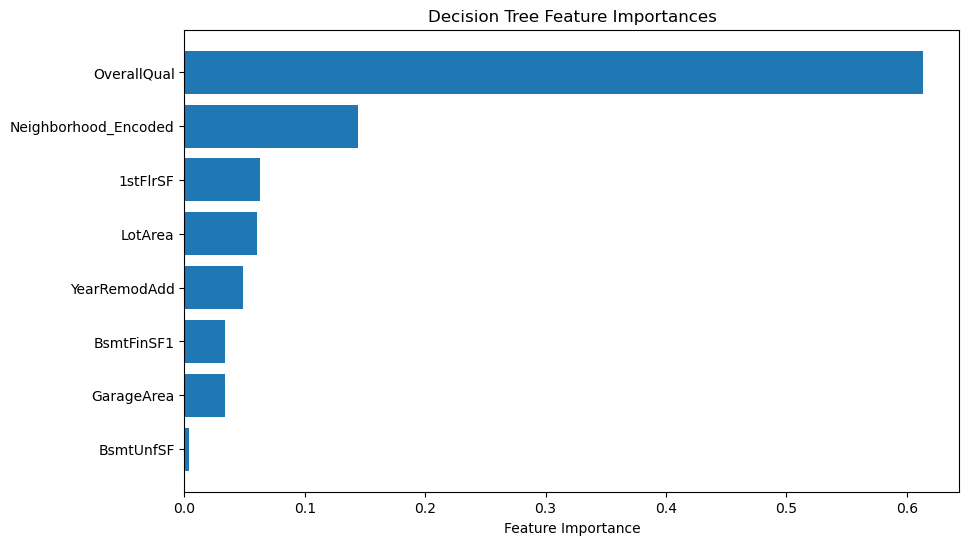

In [114]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Train the model first
model = DecisionTreeRegressor(max_depth=7, random_state=42)

# Fit the model with your training data
model.fit(X_train_selected, y_train)

# Now, you can get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Importance': importances
})

# Sort the feature importances in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features on top
plt.show()



In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Create the Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best MAE: {-grid_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculate MAE, RMSE, and R² score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

In [ ]:
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best MAE: {-grid_search.best_score_:.4f}")

Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best MAE: 16864.1182


In [ ]:
# Get the best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the final results
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")




MAE: 16764.3248
RMSE: 29409.7941
R²: 0.8872
